### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

#### Константы

In [42]:
RANDOM_STATE = 0

### 1.1 Кластеризация набора данных

#### Считывание данных 2020 года

In [2]:
df_2020 = pd.read_csv('df_2020.csv')

In [12]:
df_2020.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,0,238.0,239.0,1.0,6.00,3.0,0.5,1.47,0.0,11.27,2.5
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,0,239.0,238.0,1.0,7.00,3.0,0.5,1.50,0.0,12.30,2.5
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,0,238.0,238.0,1.0,6.00,3.0,0.5,1.00,0.0,10.80,2.5
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,0,238.0,151.0,1.0,5.50,0.5,0.5,1.36,0.0,8.16,0.0
4,2,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,0,193.0,193.0,2.0,3.50,0.5,0.5,0.00,0.0,4.80,0.0
5,2,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM,1.0,0.03,0,7.0,193.0,2.0,2.50,0.5,0.5,0.00,0.0,3.80,0.0
6,2,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM,1.0,0.00,0,193.0,193.0,1.0,2.50,0.5,0.5,0.01,0.0,3.81,0.0
7,2,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,1.0,0.00,0,193.0,193.0,1.0,0.01,0.0,0.0,0.00,0.0,2.81,2.5
8,2,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM,4.0,0.00,0,193.0,193.0,1.0,2.50,0.5,0.5,0.00,0.0,6.30,2.5
9,1,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,2.0,0.70,0,246.0,48.0,1.0,8.00,3.0,0.5,2.35,0.0,14.15,2.5


#### Считывание данных 2021 года

In [4]:
df_2021 = pd.read_csv('df_2021.csv')

In [11]:
df_2021.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge
0,1,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,0,142.0,43.0,2.0,8.0,3.0,0.5,0.00,0.0,11.80,2.5
1,1,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,0,238.0,151.0,2.0,3.0,0.5,0.5,0.00,0.0,4.30,0.0
2,2,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,0,68.0,33.0,1.0,16.5,0.5,0.5,4.06,0.0,24.36,2.5
3,1,01/01/2021 12:16:29 AM,01/01/2021 12:24:30 AM,1.0,1.60,0,224.0,68.0,1.0,8.0,3.0,0.5,2.35,0.0,14.15,2.5
4,1,01/01/2021 12:00:28 AM,01/01/2021 12:17:28 AM,1.0,4.10,0,95.0,157.0,2.0,16.0,0.5,0.5,0.00,0.0,17.30,0.0
5,1,01/01/2021 12:12:29 AM,01/01/2021 12:30:34 AM,1.0,5.70,0,90.0,40.0,2.0,18.0,3.0,0.5,0.00,0.0,21.80,2.5
6,1,01/01/2021 12:26:12 AM,01/01/2021 12:39:46 AM,2.0,2.70,0,263.0,142.0,1.0,12.0,3.0,0.5,3.15,0.0,18.95,2.5
7,2,01/01/2021 12:46:36 AM,01/01/2021 12:53:45 AM,2.0,1.21,0,255.0,80.0,1.0,7.0,0.5,0.5,2.49,0.0,10.79,0.0
8,2,01/01/2021 12:31:06 AM,01/01/2021 12:38:52 AM,5.0,1.70,0,142.0,50.0,1.0,8.0,0.5,0.5,2.36,0.0,14.16,2.5
9,2,01/01/2021 12:42:11 AM,01/01/2021 12:44:24 AM,5.0,0.81,0,50.0,142.0,2.0,4.5,0.5,0.5,0.00,0.0,8.30,2.5


In [ ]:
df_2019 = pd.read_csv('')

In [ ]:
df_2019.head(10)

In [6]:
df_2020.shape

(10176615, 16)

In [7]:
df_2021.shape

(11057606, 16)

##### Дата в кластеризации данных не будет учавствовать

In [9]:
data_2020 = df_2020[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

In [10]:
data_2020

,tpep_pickup_datetime,tpep_dropoff_datetime
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM
...,...,...
10176610,02/26/2020 10:14:39 PM,02/26/2020 10:18:04 PM
10176611,02/26/2020 10:20:09 PM,02/26/2020 10:39:06 PM
10176612,02/26/2020 10:53:57 PM,02/26/2020 11:13:46 PM
10176613,02/26/2020 10:01:32 PM,02/26/2020 10:10:54 PM


In [13]:
df_2020.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [14]:
data_2021 = df_2021[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

In [15]:
data_2021

,tpep_pickup_datetime,tpep_dropoff_datetime
0,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM
1,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM
2,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM
3,01/01/2021 12:16:29 AM,01/01/2021 12:24:30 AM
4,01/01/2021 12:00:28 AM,01/01/2021 12:17:28 AM
...,...,...
11057601,07/16/2021 08:44:37 AM,07/16/2021 08:59:17 AM
11057602,07/16/2021 08:08:39 AM,07/16/2021 08:14:22 AM
11057603,07/16/2021 08:22:16 AM,07/16/2021 08:31:36 AM
11057604,07/16/2021 08:49:54 AM,07/16/2021 08:59:20 AM


In [16]:
df_2021.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [21]:
#### Функция для облегчения данных
def change_types(df):
    for i in df.columns:
        if df[i].dtype == np.float64:
            df[i] = df[i].astype('float32')
        elif df[i].dtype == np.int64:
            df[i] = df[i].astype('int32')
    return df

In [32]:
change_types(df_2020)

In [33]:
change_types(df_2021)

In [34]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176615 entries, 0 to 10176614
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              int32  
 1   passenger_count       float32
 2   trip_distance         float32
 3   store_and_fwd_flag    int32  
 4   PULocationID          float32
 5   DOLocationID          float32
 6   payment_type          float32
 7   fare_amount           float32
 8   extra                 float32
 9   mta_tax               float32
 10  tip_amount            float32
 11  tolls_amount          float32
 12  total_amount          float32
 13  congestion_surcharge  float32
dtypes: float32(12), int32(2)
memory usage: 543.5 MB


In [35]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11057606 entries, 0 to 11057605
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              int32  
 1   passenger_count       float32
 2   trip_distance         float32
 3   store_and_fwd_flag    int32  
 4   PULocationID          float32
 5   DOLocationID          float32
 6   payment_type          float32
 7   fare_amount           float32
 8   extra                 float32
 9   mta_tax               float32
 10  tip_amount            float32
 11  tolls_amount          float32
 12  total_amount          float32
 13  congestion_surcharge  float32
dtypes: float32(12), int32(2)
memory usage: 590.5 MB


#### Выбор количества кластеров методом локтя

#### 2020

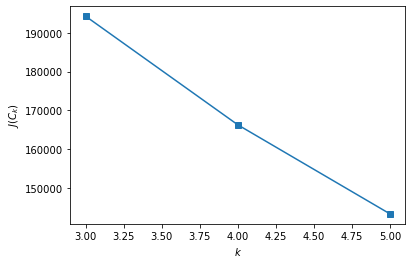

In [36]:
X = df_2020

inertia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 6), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

##### Здесь резкое падение J начинается с 4 кластера - следовательно это количество и берется

##### Модели будут использоваться следующие:

#### kmeans -

Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике

#### MiniBatchKMeans -
Это MiniBatchKMeans вариант KMeans алгоритма, который использует мини-пакеты для сокращения времени вычислений, но при этом пытается оптимизировать ту же целевую функцию. Мини-пакеты — это подмножества входных данных, которые выбираются случайным образом на каждой итерации обучения. Эти мини-пакеты резко сокращают объем вычислений, необходимых для схождения к локальному решению. В отличие от других алгоритмов, которые сокращают время сходимости k-средних, мини-пакетные k-средние дают результаты, которые, как правило, лишь немного хуже, чем стандартный алгоритм.

#### GaussianMixture -

Модель смеси Гаусса (GMM) пытается найти смесь многомерных гауссовских распределений вероятностей, которые лучше всего моделируют любой входной набор данных. В простейшем случае ГММ могут использоваться для поиска кластеров таким же образом, как k-средние

##### Выбор пал именно на эти, так как в них имееется возможость выбора кол-ства кластеров, а также MiniBatchKMeans позволяет быстро работать на больших данных

##### Для визуализации будет использоваться график scatter, чтобы наглядно видеть, как расположились точки

#### Сразу уменьшу до 2 мерного пространства для визуализации

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

#### Обучение Kmeans

In [38]:
# Получение распределения от kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
label = kmeans.fit_predict(X)

#### График Kmeans

Text(0, 0.5, 'Second Principal Component')

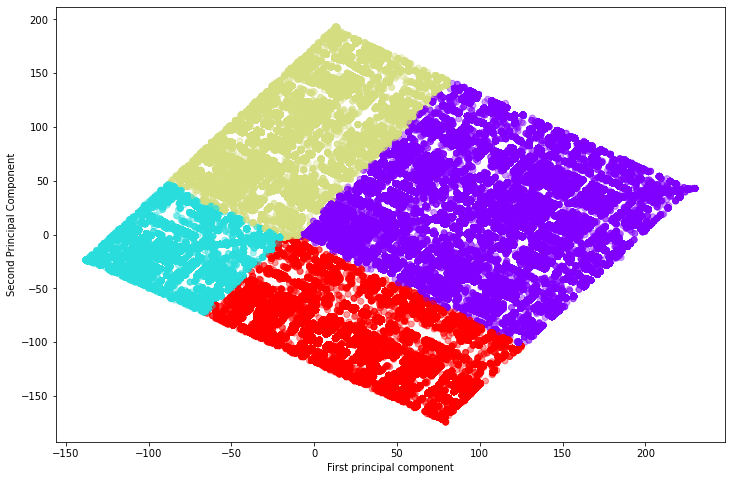

In [41]:
# График распределения кластеров в kmeans
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [44]:
# Просмотр того, как распределились данные 
label = pd.Series(label)
label.value_counts()

0    3642034
2    2355420
3    2345774
1    1833387
dtype: int64

##### График получился почти идеальным, так как все кластеры расположены отдельно, не влезая друг в друга, также как и распределение, так как нет дисбаланса

#### GaussianMixture

In [54]:
# Получение распределения от GaussianMixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(4, covariance_type='full', random_state=RANDOM_STATE).fit(X)

labels_3 = gmm.predict(X)

#### График GaussianMixture

Text(0, 0.5, 'Second Principal Component')

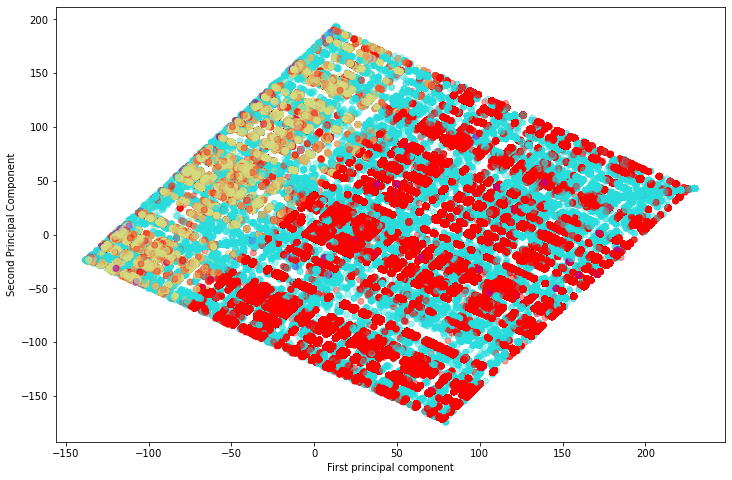

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_3,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [59]:
# Просмотр того, как распределились данные
labels_3 = pd.Series(labels_3)
labels_3.value_counts()

3    6705316
2    2849024
1     506538
0     115737
dtype: int64

##### Здесь ситуация уже горадо хуже, так как кластеры смешались, и баланс классов получился не такой равномерный

#### MiniBatchKMeans

In [64]:
from sklearn.cluster import MiniBatchKMeans

In [65]:
MiniBatchModel = MiniBatchKMeans(n_clusters=4, random_state=RANDOM_STATE).fit(X)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


#### MiniBatchKMeans график

Text(0, 0.5, 'Second Principal Component')

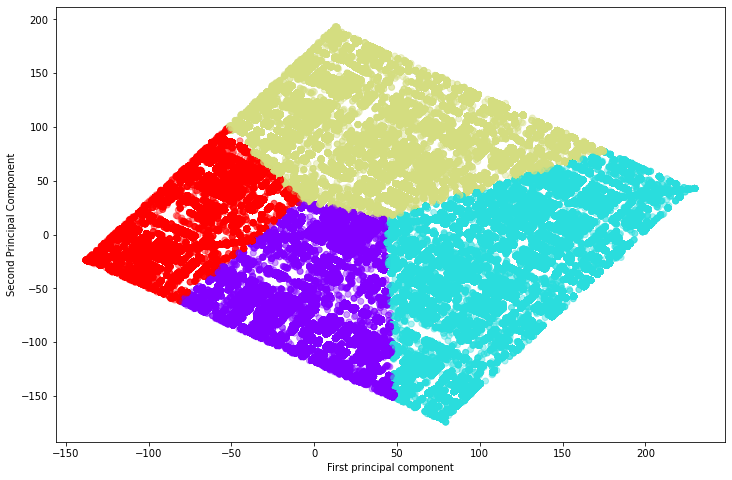

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_2,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [66]:
labels_2 = MiniBatchModel.predict(X)

In [67]:
labels_2 = pd.Series(labels_2)
labels_2.value_counts()

0    3326807
3    3028948
1    1988382
2    1832478
dtype: int64

##### Здесь получилось также хорошо как и в простом Kmeans, однако кластеры распредились немного по-другому

##### Так как трудно рассудить, что использовать дальше kmeans или MiniBatchKMeans. Для этого использую еще одну метрику Calinski-Harabasz

In [69]:
# Импорт метрик
from sklearn import metrics
print('метрики Kmeans = ' + str(metrics.calinski_harabasz_score(x_pca, label)) + '\n' +
     'метрики MiniBatchKMeans = ' + str(metrics.calinski_harabasz_score(x_pca, labels_2)) + '\n' +
      'метрики GaussianMixture = ' + str(metrics.calinski_harabasz_score(x_pca, labels_3)))

метрики Kmeans = 8272015.693360675
метрики MiniBatchKMeans = 7570163.581470016
метрики GaussianMixture = 1063503.4066630832


##### метрика Calinski-Harabasz работает так, что чем больше значение, тем лучше получилось распределение, поэтому выбор пал на kmeans

#### Возвращаю время и добавляю классы в датафрейм

In [75]:
data_2020.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], dtype='object')

In [76]:
df_2020['tpep_pickup_datetime'] = data_2020['tpep_pickup_datetime']

In [77]:
df_2020['tpep_dropoff_datetime'] = data_2020['tpep_dropoff_datetime']

In [78]:
df_2020['Classes'] = label

#### Просмотр того какие статистические данные имеет каждый класс

#### 0 class

In [85]:
df_2020[df_2020['Classes'] == 0].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3.642034e+06,3642034.0,3.642034e+06,3.642034e+06,3642034.0
mean,1.684123e+00,1.541220e+00,1.734829e+00,9.672068e-03,1.176160e+02,1.142993e+02,1.277775e+00,9.145970e+00,1.051697e+00,4.974636e-01,1.689061e+00,0.0,1.423331e+01,2.287773e+00,0.0
std,4.648641e-01,1.148117e+00,1.183972e+00,9.786992e-02,4.403055e+01,4.608997e+01,4.642321e-01,4.140310e+00,1.187284e+00,4.996593e-02,1.391279e+00,0.0,5.064726e+00,6.970680e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-1.890000e+00,0.0,-1.251000e+01,-2.500000e+00,0.0
25%,1.000000e+00,1.000000e+00,8.800000e-01,0.000000e+00,7.900000e+01,7.900000e+01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.056000e+01,2.500000e+00,0.0
50%,2.000000e+00,1.000000e+00,1.400000e+00,0.000000e+00,1.400000e+02,1.370000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.840000e+00,0.0,1.350000e+01,2.500000e+00,0.0
75%,2.000000e+00,2.000000e+00,2.280000e+00,0.000000e+00,1.610000e+02,1.610000e+02,2.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.580000e+00,0.0,1.716000e+01,2.500000e+00,0.0
max,2.000000e+00,6.000000e+00,5.780000e+00,1.000000e+00,1.790000e+02,1.780000e+02,5.000000e+00,2.400000e+01,5.500000e+00,3.951000e+01,7.350000e+00,0.0,4.402000e+01,2.750000e+00,0.0


#### 1 class

In [86]:
df_2020[df_2020['Classes'] == 1].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1.833387e+06,1833387.0,1.833387e+06,1.833387e+06,1833387.0
mean,1.672521e+00,1.533464e+00,1.591876e+00,1.049915e-02,2.329092e+02,2.336672e+02,1.258554e+00,8.632880e+00,1.096550e+00,4.963603e-01,1.687786e+00,0.0,1.384376e+01,2.416395e+00,1.0
std,4.692938e-01,1.128523e+00,1.125368e+00,1.019261e-01,1.839691e+01,1.748317e+01,4.620812e-01,4.195618e+00,1.234246e+00,5.385203e-02,1.342491e+00,0.0,5.061337e+00,4.647875e-01,0.0
min,1.000000e+00,1.000000e+00,-8.800000e-01,0.000000e+00,1.790000e+02,1.780000e+02,1.000000e+00,-4.000000e+00,-3.500000e+00,-5.000000e-01,-2.650000e+00,0.0,-1.431000e+01,-2.500000e+00,1.0
25%,1.000000e+00,1.000000e+00,7.900000e-01,0.000000e+00,2.310000e+02,2.310000e+02,1.000000e+00,5.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.030000e+01,2.500000e+00,1.0
50%,2.000000e+00,1.000000e+00,1.290000e+00,0.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,7.500000e+00,5.000000e-01,5.000000e-01,1.760000e+00,0.0,1.280000e+01,2.500000e+00,1.0
75%,2.000000e+00,2.000000e+00,2.100000e+00,0.000000e+00,2.390000e+02,2.390000e+02,1.000000e+00,1.100000e+01,2.500000e+00,5.000000e-01,2.500000e+00,0.0,1.656000e+01,2.500000e+00,1.0
max,2.000000e+00,6.000000e+00,5.780000e+00,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.400000e+01,3.500000e+00,6.800000e+00,7.350000e+00,0.0,3.651000e+01,2.750000e+00,1.0


#### 2 класс - 

In [87]:
df_2020[df_2020['Classes'] == 2].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2.355420e+06,2355420.0,2.355420e+06,2.355420e+06,2355420.0
mean,1.682241e+00,1.543609e+00,1.822390e+00,1.024828e-02,1.230485e+02,2.311486e+02,1.248369e+00,9.431162e+00,1.104038e+00,4.991659e-01,1.794207e+00,0.0,1.476742e+01,2.413176e+00,2.0
std,4.656053e-01,1.137754e+00,1.138945e+00,1.007137e-01,4.296518e+01,1.839867e+01,4.468486e-01,4.020635e+00,1.221807e+00,2.546971e-02,1.383875e+00,0.0,4.790516e+00,4.565624e-01,0.0
min,1.000000e+00,1.000000e+00,-1.790000e+00,0.000000e+00,1.000000e+00,1.730000e+02,1.000000e+00,-4.000000e+00,-3.500000e+00,-5.000000e-01,-2.000000e+00,0.0,-8.620000e+00,-2.500000e+00,2.0
25%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,2.300000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.127000e+01,2.500000e+00,2.0
50%,2.000000e+00,1.000000e+00,1.500000e+00,0.000000e+00,1.410000e+02,2.360000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.0,1.380000e+01,2.500000e+00,2.0
75%,2.000000e+00,2.000000e+00,2.390000e+00,0.000000e+00,1.610000e+02,2.390000e+02,1.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.0,1.730000e+01,2.500000e+00,2.0
max,2.000000e+00,6.000000e+00,5.780000e+00,1.000000e+00,1.800000e+02,2.650000e+02,4.000000e+00,2.400000e+01,3.500000e+00,5.000000e-01,7.320000e+00,0.0,3.607000e+01,2.750000e+00,2.0


#### 3 класс - 

In [88]:
df_2020[df_2020['Classes'] == 3].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2.345774e+06,2345774.0,2.345774e+06,2.345774e+06,2345774.0
mean,1.674849e+00,1.535685e+00,1.787201e+00,9.770336e-03,2.302191e+02,1.195792e+02,1.246541e+00,9.435186e+00,1.103079e+00,4.994353e-01,1.791961e+00,0.0,1.477516e+01,2.446114e+00,3.0
std,4.684314e-01,1.132389e+00,1.100351e+00,9.836097e-02,1.958567e+01,4.501638e+01,4.457341e-01,4.002420e+00,1.228190e+00,2.191697e-02,1.381712e+00,0.0,4.765914e+00,3.661890e-01,0.0
min,1.000000e+00,1.000000e+00,-1.480000e+00,0.000000e+00,1.740000e+02,1.000000e+00,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-1.360000e+00,0.0,-1.251000e+01,-2.500000e+00,3.0
25%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.300000e+02,7.900000e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.130000e+01,2.500000e+00,3.0
50%,2.000000e+00,1.000000e+00,1.500000e+00,0.000000e+00,2.360000e+02,1.410000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.0,1.380000e+01,2.500000e+00,3.0
75%,2.000000e+00,2.000000e+00,2.300000e+00,0.000000e+00,2.390000e+02,1.610000e+02,1.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.670000e+00,0.0,1.730000e+01,2.500000e+00,3.0
max,2.000000e+00,6.000000e+00,5.780000e+00,1.000000e+00,2.650000e+02,1.790000e+02,4.000000e+00,2.400000e+01,3.500000e+00,2.500000e+00,7.350000e+00,0.0,3.771000e+01,2.750000e+00,3.0


##### 0 и 3, 1 и 2 попарно схожи по DOLocationID, но при этом 0 и 2, 1 и 3 попарно схожи в PULocationID
##### по payment_type 0 класс отличается от остальных
##### по fare_amount 1 класс отличается от остальных
##### extra также наибольшее у 0 класса 
##### mta_tax у 1 класса наибольшее
##### tip_amount наибольшие у 2 и 3 класса 
##### total_amount  2,3 > 0 > 1
##### congestion_surcharge у всех одинаковый

##### классы 2 и 3 в принципе очень похожи - много чаевых и высокая общая конечная сумма относительно других

##### класс 0 сильно платит отлично от всех и при этом тратит больше всех на различную доплату из-за чего, скорее всего, и выходит такая большая общая сумма

##### класс 1 ездят на самой дешевой стоимости проезда, при этом тратя наибольшее кол-во денег на налог мта

#### 2021

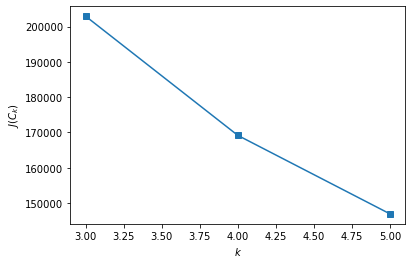

In [70]:
X = df_2021

inertia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 6), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

##### Здесь также резкое падение начинается с 4 кластеров, что не удивительно так как выборки очень похожи

In [73]:
X_2021 = df_2021
pca = PCA(n_components=2)
x_pca_2021 = pca.fit_transform(X_2021)

#### Обучение Kmeans

In [81]:
%%time
# Получение распределения от kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=RANDOM_STATE)
label_2021 = kmeans.fit_predict(X_2021)

Wall time: 1min 2s


#### График Kmeans

Text(0, 0.5, 'Second Principal Component')

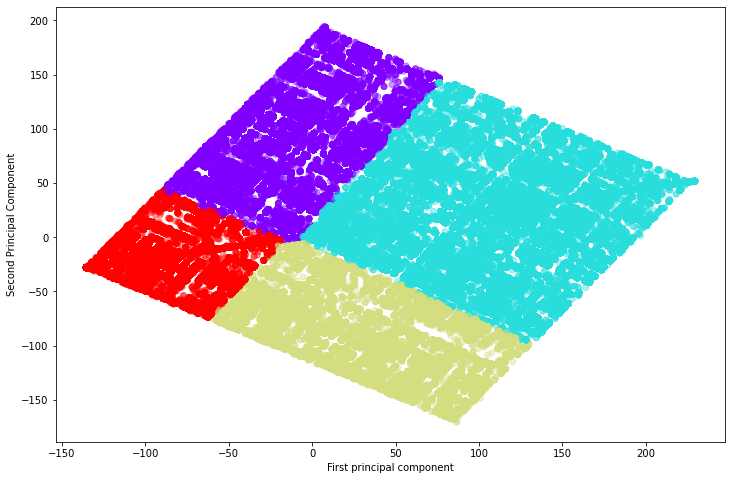

In [83]:
# График распределения кластеров в kmeans
plt.figure(figsize=(12,8))
plt.scatter(x_pca_2021[:,0],x_pca_2021[:,1],c=label_2021,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [44]:
# Просмотр того, как распределились данные 
label = pd.Series(label)
label.value_counts()

0    3642034
2    2355420
3    2345774
1    1833387
dtype: int64

##### График получился почти идеальным, так как все кластеры расположены отдельно, не влезая друг в друга, также как и распределение, так как нет дисбаланса

##### График распределения кластеров такой же как и у 20 года

#### GaussianMixture

In [89]:
# Получение распределения от GaussianMixture
gmm = GaussianMixture(4, covariance_type='full', random_state=RANDOM_STATE).fit(X_2021)

labels_3_2021 = gmm.predict(X_2021)

#### График GaussianMixture

Text(0, 0.5, 'Second Principal Component')

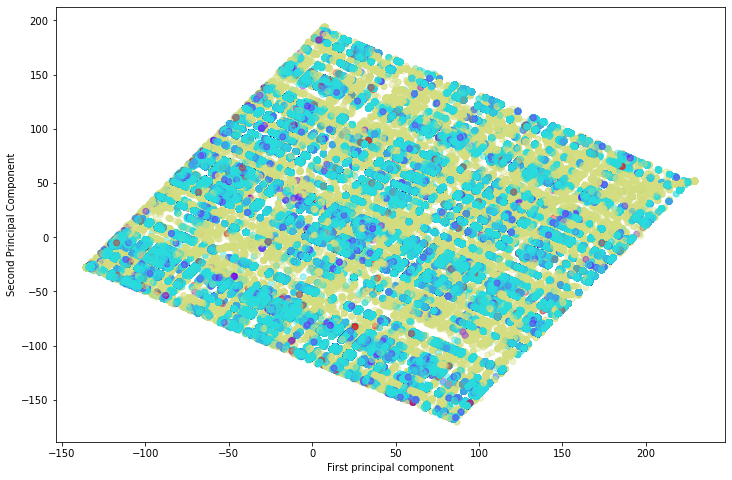

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca_2021[:,0],x_pca_2021[:,1],c=labels_3_2021,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [91]:
# Просмотр того, как распределились данные
labels_3_2021 = pd.Series(labels_3_2021)
labels_3_2021.value_counts()

1    9525838
0     776377
2     606534
3     148857
dtype: int64

##### Здесь ситуация уже горадо хуже, так как кластеры смешались, и баланс классов получился не такой равномерный

##### MiniBatchKmean рассматривать смысла нет, так как он будет немного, но хуже kmeans - cледовательно и здесь будет kmeans

##### Возвращаю время и добавляю классы в 21 год

In [92]:
df_2021['tpep_pickup_datetime'] = data_2021['tpep_pickup_datetime']

In [93]:
df_2021['tpep_dropoff_datetime'] = data_2021['tpep_dropoff_datetime']

In [94]:
df_2021['Classes'] = label_2021

#### Просмотр того какие статистические данные имеет каждый класс

#### 0 class

In [95]:
df_2021[df_2021['Classes'] == 0].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2.572659e+06,2572659.0,2.572659e+06,2.572659e+06,2572659.0
mean,1.703773e+00,1.452769e+00,1.938741e+00,1.170501e-02,1.225631e+02,2.339533e+02,1.228294e+00,9.416895e+00,1.038992e+00,4.987625e-01,1.871943e+00,0.0,1.481804e+01,2.411960e+00,0.0
std,4.565926e-01,1.037994e+00,1.163178e+00,1.075547e-01,4.190601e+01,1.748197e+01,4.400641e-01,4.007227e+00,1.202768e+00,3.079037e-02,1.405685e+00,0.0,4.762965e+00,4.615204e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.730000e+02,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-1.500000e+00,0.0,-8.800000e+00,-2.500000e+00,0.0
25%,1.000000e+00,1.000000e+00,1.070000e+00,0.000000e+00,9.000000e+01,2.310000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,5.300000e-01,0.0,1.130000e+01,2.500000e+00,0.0
50%,2.000000e+00,1.000000e+00,1.640000e+00,0.000000e+00,1.410000e+02,2.360000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.0,1.400000e+01,2.500000e+00,0.0
75%,2.000000e+00,1.000000e+00,2.550000e+00,0.000000e+00,1.610000e+02,2.390000e+02,1.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.0,1.760000e+01,2.500000e+00,0.0
max,2.000000e+00,6.000000e+00,5.870000e+00,1.000000e+00,1.800000e+02,2.650000e+02,4.000000e+00,2.400000e+01,5.000000e+00,5.000000e-01,7.370000e+00,0.0,3.538000e+01,2.750000e+00,0.0


#### 1 class

In [96]:
df_2021[df_2021['Classes'] == 1].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3.828138e+06,3828138.0,3.828138e+06,3.828138e+06,3828138.0
mean,1.702126e+00,1.451360e+00,1.848035e+00,1.126135e-02,1.161590e+02,1.128026e+02,1.276474e+00,9.132024e+00,9.695477e-01,4.960166e-01,1.716189e+00,0.0,1.417381e+01,2.225555e+00,1.0
std,4.573240e-01,1.043228e+00,1.198373e+00,1.055203e-01,4.348128e+01,4.625375e+01,4.703325e-01,4.136505e+00,1.185057e+00,5.756087e-02,1.432759e+00,0.0,5.091323e+00,7.896693e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-4.000000e+00,0.0,-1.030000e+01,-2.500000e+00,1.0
25%,1.000000e+00,1.000000e+00,9.600000e-01,0.000000e+00,7.900000e+01,7.500000e+01,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.056000e+01,2.500000e+00,1.0
50%,2.000000e+00,1.000000e+00,1.570000e+00,0.000000e+00,1.380000e+02,1.370000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.0,1.350000e+01,2.500000e+00,1.0
75%,2.000000e+00,1.000000e+00,2.430000e+00,0.000000e+00,1.610000e+02,1.580000e+02,2.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.660000e+00,0.0,1.716000e+01,2.500000e+00,1.0
max,2.000000e+00,6.000000e+00,5.870000e+00,1.000000e+00,1.800000e+02,1.790000e+02,4.000000e+00,2.400000e+01,6.000000e+00,7.600000e-01,7.370000e+00,0.0,3.538000e+01,3.000000e+00,1.0


#### 2 класс - 

In [97]:
df_2021[df_2021['Classes'] == 2].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2.620518e+06,2620518.0,2.620518e+06,2.620518e+06,2620518.0
mean,1.696811e+00,1.449418e+00,1.901812e+00,1.115085e-02,2.330211e+02,1.185356e+02,1.230915e+00,9.342968e+00,1.020268e+00,4.990352e-01,1.851303e+00,0.0,1.470477e+01,2.442873e+00,2.0
std,4.596361e-01,1.037268e+00,1.125548e+00,1.050072e-01,1.917337e+01,4.456916e+01,4.413286e-01,3.934770e+00,1.210315e+00,2.778871e-02,1.402302e+00,0.0,4.695888e+00,3.789189e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.740000e+02,1.000000e+00,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-1.660000e+00,0.0,-9.960000e+00,-2.500000e+00,2.0
25%,1.000000e+00,1.000000e+00,1.070000e+00,0.000000e+00,2.310000e+02,7.900000e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.0,1.130000e+01,2.500000e+00,2.0
50%,2.000000e+00,1.000000e+00,1.610000e+00,0.000000e+00,2.360000e+02,1.400000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.0,1.380000e+01,2.500000e+00,2.0
75%,2.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,2.390000e+02,1.610000e+02,1.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.0,1.730000e+01,2.500000e+00,2.0
max,2.000000e+00,6.000000e+00,5.870000e+00,1.000000e+00,2.650000e+02,1.790000e+02,4.000000e+00,2.400000e+01,3.500000e+00,3.850000e+00,7.370000e+00,0.0,3.538000e+01,2.500000e+00,2.0


#### 3 класс - 

In [98]:
df_2021[df_2021['Classes'] == 3].describe()

,VendorID,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,Classes
count,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2.036291e+06,2036291.0,2.036291e+06,2.036291e+06,2036291.0
mean,1.698513e+00,1.450402e+00,1.698330e+00,1.206409e-02,2.333503e+02,2.343906e+02,1.240820e+00,8.640794e+00,1.018631e+00,4.946150e-01,1.783120e+00,0.0,1.392181e+01,2.416132e+00,3.0
std,4.589037e-01,1.034446e+00,1.181947e+00,1.091721e-01,1.782791e+01,1.650482e+01,4.613049e-01,4.182855e+00,1.211307e+00,6.624108e-02,1.373931e+00,0.0,5.081257e+00,4.773948e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.790000e+02,1.780000e+02,1.000000e+00,-4.000000e+00,-1.000000e+00,-5.000000e-01,-3.000000e+00,0.0,-9.750000e+00,-2.500000e+00,3.0
25%,1.000000e+00,1.000000e+00,8.100000e-01,0.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,5.500000e+00,0.000000e+00,5.000000e-01,1.000000e-02,0.0,1.035000e+01,2.500000e+00,3.0
50%,2.000000e+00,1.000000e+00,1.400000e+00,0.000000e+00,2.370000e+02,2.370000e+02,1.000000e+00,7.500000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.0,1.295000e+01,2.500000e+00,3.0
75%,2.000000e+00,1.000000e+00,2.240000e+00,0.000000e+00,2.390000e+02,2.390000e+02,1.000000e+00,1.100000e+01,2.500000e+00,5.000000e-01,2.640000e+00,0.0,1.656000e+01,2.500000e+00,3.0
max,2.000000e+00,6.000000e+00,5.870000e+00,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.400000e+01,6.000000e+00,3.300000e+00,7.330000e+00,0.0,3.538000e+01,2.500000e+00,3.0


##### 0 и 3, 1 и 2 попарно схожи по DOLocationID, но при этом 0 и 1, 2 и 3 попарно схожи в PULocationID
##### extra также наибольшее у 1  u 3 класса, после идет 2
##### mta_tax у 1 класса наибольшее
##### congestion_surcharge у всех одинаковый

##### В этом датафрейме уже тяжело выявить различия в классах, так как они очень сильно похожи, то есть значения практически идентичны

#### 2019

#### MiniBatchKMeans

In [14]:
df_2019 = pd.read_csv('df_2019.csv')

In [15]:
data_2019 = df_2019[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]

In [16]:
df_2019.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [17]:
df_2019.drop(['improvement_surcharge', 'RatecodeID'], axis=1, inplace=True)

In [18]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56431561 entries, 0 to 56431560
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              float64
 1   passenger_count       float64
 2   trip_distance         float64
 3   store_and_fwd_flag    int64  
 4   PULocationID          int64  
 5   DOLocationID          int64  
 6   payment_type          float64
 7   fare_amount           float64
 8   extra                 float64
 9   mta_tax               float64
 10  tip_amount            float64
 11  tolls_amount          float64
 12  total_amount          float64
 13  congestion_surcharge  float64
dtypes: float64(11), int64(3)
memory usage: 5.9 GB


In [19]:
change_types(df_2019)

In [20]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56431561 entries, 0 to 56431560
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              float32
 1   passenger_count       float32
 2   trip_distance         float32
 3   store_and_fwd_flag    int32  
 4   PULocationID          int32  
 5   DOLocationID          int32  
 6   payment_type          float32
 7   fare_amount           float32
 8   extra                 float32
 9   mta_tax               float32
 10  tip_amount            float32
 11  tolls_amount          float32
 12  total_amount          float32
 13  congestion_surcharge  float32
dtypes: float32(11), int32(3)
memory usage: 2.9 GB


In [22]:
df = df_2019.copy(deep=True)

In [23]:
df = change_types(df_2019)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56431561 entries, 0 to 56431560
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   VendorID              float32
 1   passenger_count       float32
 2   trip_distance         float32
 3   store_and_fwd_flag    int32  
 4   PULocationID          int32  
 5   DOLocationID          int32  
 6   payment_type          float32
 7   fare_amount           float32
 8   extra                 float32
 9   mta_tax               float32
 10  tip_amount            float32
 11  tolls_amount          float32
 12  total_amount          float32
 13  congestion_surcharge  float32
dtypes: float32(11), int32(3)
memory usage: 2.9 GB


In [ ]:
df.to_csv("123.csv", index=False)

In [ ]:
X_2019 = df_2019
pca = PCA(n_components=2)
x_pca_2019 = pca.fit_transform(X_2019)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
MiniBatchModel = MiniBatchKMeans(n_clusters=4, random_state=RANDOM_STATE).fit(X_2019)

In [ ]:
labels_2 = MiniBatchModel.predict(X)

In [ ]:
labels_2 = pd.Series(labels_2)
labels_2.value_counts()

#### MiniBatchKMeans график

Text(0, 0.5, 'Second Principal Component')

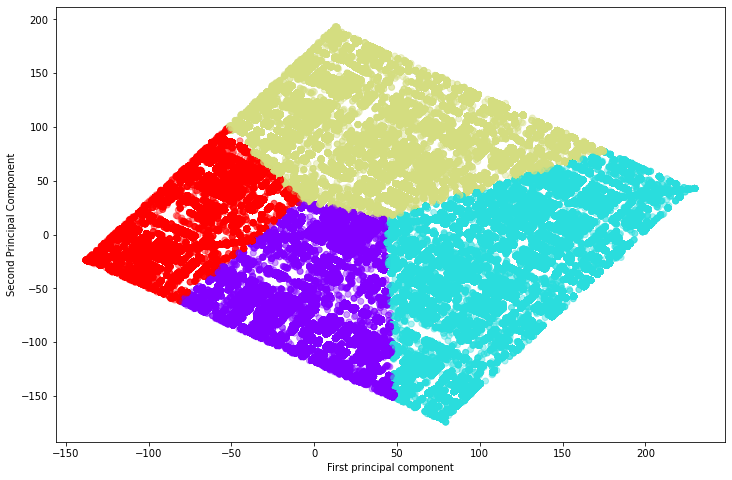

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca_2019[:,0],x_pca_2019[:,1],c=labels_2,cmap='rainbow', alpha=0.4)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### 2.3  Подготовка отчета

#### 2.1 и 2.2 Было выбрано наилучшее кол-во кластеров и после чего обучена и отобрана наилучшая модель с помощью построения scatter plot, рассмотрения того, как распределились классы, а также с помощью метрики Calinski-Harabasz. После чего классы были добавлены как новый признак и рассмотрены по статистическим данным